## 소수
- 1과 자신 이외에는 나눠지지 않는 수

In [1]:
import numpy as np
import time

In [2]:
from pyspark import SparkContext

In [3]:
# 스파크 접속
sc =SparkContext.getOrCreate()

In [4]:
sc

<SparkContext master=local[*] appName=PySparkShell>

In [5]:
# 소수를 계산할 최대 수
MAX = 100000

In [6]:
# 3이상 ~ MAX+1 미만의 수를 저장한 리스트 생성
# 해당 리스트를 10개의 멀티 쓰레드로 동시에 실행
# 스파크 함수 
rdd = sc.parallelize([i for i in range(3, MAX+1)], 10)

In [7]:
# 소수를 계산할 최대의 수
def get_prime(num):
    # isPrime의 초기값 설정
    isPrime = True
    #2~num  미만의 수
    for index in range(2, num):
        if num % index == 0: 
            isPrime = False # isPrime  F 대입
            break #  반복문 종료
        
    if isPrime == True:
        return num

In [8]:
# 현재 시간을 start에 대입
start = time.time()

# rdd.map(get_prime) : rdd에 저장된 숫자들을 순서대로 get_prime 함수에 대입
# .collect() : 함수의 실행 결과를 가져옴
prime_list = rdd.map(get_prime).collect()

# 현재 시간을 end에 대입
end = time.time()

# 소요된 시간을 출력
print("소요시간: ", end-start)

소요시간:  13.475240707397461


## \<spark를 실행하지 않았을 때 처리 결과>
실행하지 않았을 때와 비교하여 확연히 빠른 처리 시간을 확인할 수 있다!

44초 

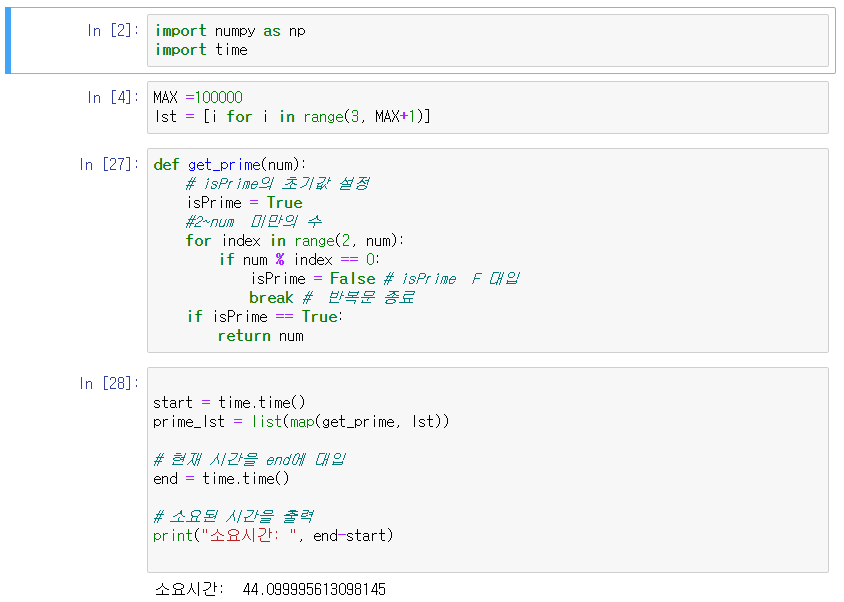
